In [95]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import os # getting filepath
import copy
import json
import matplotlib.pyplot as plt
import math


In [21]:

# def main():
#     load_bool = input("Are you loading a behaviour csv? (y/n): ")
#     # NO, I AM NOT LOADING
#     if load_bool == 'n':
#         # get list of files
#         dir_name = input("Directory name: ")
#         contents = os.listdir(dir_name) # the filenames
#         # behaviour = int(input("Requested behaviour (number): "))
#         # behaviour_table = pd.DataFrame(data=None, columns=['behaviour', 'applicablefiles','indices'])
#         behaviour_table = pd.DataFrame({'behaviour': range(0,27)})
#         behaviour_table['applicablefiles'] = np.empty((len(behaviour_table), 0)).tolist()
#         behaviour_table['indices'] = np.empty((len(behaviour_table), 0)).tolist()
#             # behaviour = number, applicablefiles = array of filenames, 
#             # indices = array of tuples of tuples with order respect to filename order
#         # for each file, look into behavior column and gather information
        
#         # json table
#         table = dict()

#         for i in contents:
#             i = os.path.join(os.path.relpath(dir_name), i)
#             data = pd.read_csv(i, sep=",", 
#                             header=0, names=['depth', 'x', 'y', 'z', 'behaviour', 'type', 'place'],
#                             low_memory=False)
            
            
            
#             indices_arr = []
            # append filenames
#             file_behaviours = data.behaviour.unique() # NOTE: NOT SURE ABOUT BEHAVIOUR
#             for j in behaviour_table['behaviour']:
#                 if j in file_behaviours:
#                     behaviour_table.iloc[j+1][1] = behaviour_table.iloc[j+1][1].append(contents[i]) # NOTE: UNSURE ABOUT BEHAVIOUR
#             for ji, jr in behaviour_table:
#                 if jr['behaviour'] in file_behaviours:
#                     jr['behaviour'] = 
            # append indices for a single file
#                 for idx_row, row in data.iterrows(): 
#                     start_idx = -1
#                     end_idx = -2
#                     recording = False
#                     if recording == False and row['behaviour'] == j:
#                         start_idx = idx_row
#                         recording = True
#                     elif recording == True and row['behaviour'] != j:
#                         end_idx = idx_row-1
#                         recording = False
#                     elif start_idx == -1 and end_idx == -2:
#                         break
#                     indices_arr.append([start_idx, end_idx])
#                 print(indices_arr)
                # set 'cell' = indices_arr
                # behaviour_table[behaviour_table['behaviour' == j]]['indices'] = indices_arr
#                 behaviour_table.iloc[j][2] = indices_arr # have to use iloc
                # print(behaviour_table.head())
        
        # save behaviour table as csv
#         end_filename = "behaviourtable" + dir_name
#         behaviour_table.to_csv(end_filename, sep=",", header=['behaviour', 'applicablefiles', 'indices'])
        # print(behaviour_table.head())
    
    
    
#     # YES, I AM LOADING
#             for fi, fr in data.iterrows():
#                 table[i] = dict()
#         print(table)
#     elif load_bool == 'y':
#         print("uh")
#     # YOU SHMUCKED UP
#     else:
#         print("Something went wrong.")

# if __name__ == "__main__":
#     main()

In [96]:
def find_ranges(iterable):
    """Yield range of consecutive numbers."""
    for group in mit.consecutive_groups(iterable):
        group = list(group)
        if len(group) == 1:
            yield group[0]
        else:
            yield group[0], group[-1]

In [100]:
import pandas as pd
import numpy as np
import os
import more_itertools as mit
import sqlite3

conn = sqlite3.connect('fursealdata.db')
c = conn.cursor()
c.execute('''DROP TABLE fursealdata''')
c.execute('''CREATE TABLE fursealdata
             (behaviour integer, filename text, range text, depth blob, x blob, 
             y blob, z blob, type blob, place blob)''')
conn.commit()

# iterate through files and insert information into the db file
dir_name = input("Directory name: ")
contents = os.listdir(dir_name) # the filenames

for i in contents:
    i = os.path.join(os.path.relpath(dir_name), i)
    data = pd.read_csv(i, sep=",", header=0, 
                       names=['depth', 'x', 'y', 'z', 'behaviour', 'type', 'place'],
                       low_memory=False)
    # print(data)
    for behaviour in range(0, 27):
        temp = data.loc[data['behaviour'] == b]
#         print(b, '=' * 20)
        if len(temp) > 0:
#             print(i)
            indexes = temp.index.tolist()
            groups = list(find_ranges(indexes))
            for r in groups:
#                 print(r)
#                 print(data['x'].iloc[groups[0]])
                x = data.iloc[r[0]:r[1]]['x']
                y = data.iloc[r[0]:r[1]]['y']
                z = data.iloc[r[0]:r[1]]['z']
                depth = data.iloc[r[0]:r[1]]['depth']
                t = data.iloc[r[0]:r[1]]['type']
                place = data.iloc[r[0]:r[1]]['place']
#                 print(type(list(place)))
                c.execute("INSERT INTO fursealdata VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)", 
                          (behaviour, i, str(r), str(list(depth)), str(list(x)), 
                           str(list(y)), str(list(z)), str(list(t)), str(list(place))))
            conn.commit()
conn.close()

Directory name: cleandata_copy


In [127]:
conn = sqlite3.connect('fursealdata.db')
c = conn.cursor()

files_and_ranges = []

for row in c.execute("SELECT * FROM fursealdata WHERE behaviour = 4"):
    files_and_ranges.append(row)
    
conn.close()
print(files_and_ranges[0])

(4, 'cleandata_copy/nelson081114_c.csv', '(100, 168)', '[0.5, 0.46, 0.5, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.5, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.5, 0.46, 0.46, 0.46, 0.46, 0.5, 0.46, 0.46, 0.46, 0.46, 0.5, 0.46, 0.46, 0.46, 0.46]', '[0.504, 0.46, 0.496, 0.496, 0.308, 0.16, 0.3, 0.52, 0.488, 0.35200000000000004, 0.484, 0.5720000000000001, 0.544, 0.5479999999999999, 0.792, 0.708, 0.932, 0.5920000000000001, 0.728, 0.616, 0.556, 0.7240000000000001, 0.752, 0.7120000000000001, 0.68, 0.728, 0.72, 0.6759999999999999, 0.772, 0.8320000000000001, 0.7559999999999999, 0.78, 0.74, 0.736, 0.736, 0.716, 0.672, 0.672, 0.648, 0.644, 0.748, 0.82, 0.8, 0.8079999999999999, 0.7559999999999999, 0.7559999999999999, 0.8, 0.7240000000000001, 0.7120000000000001, 0.816, 0.772, 0.736, 0.74

ValueError: invalid literal for int() with base 10: '0.5'

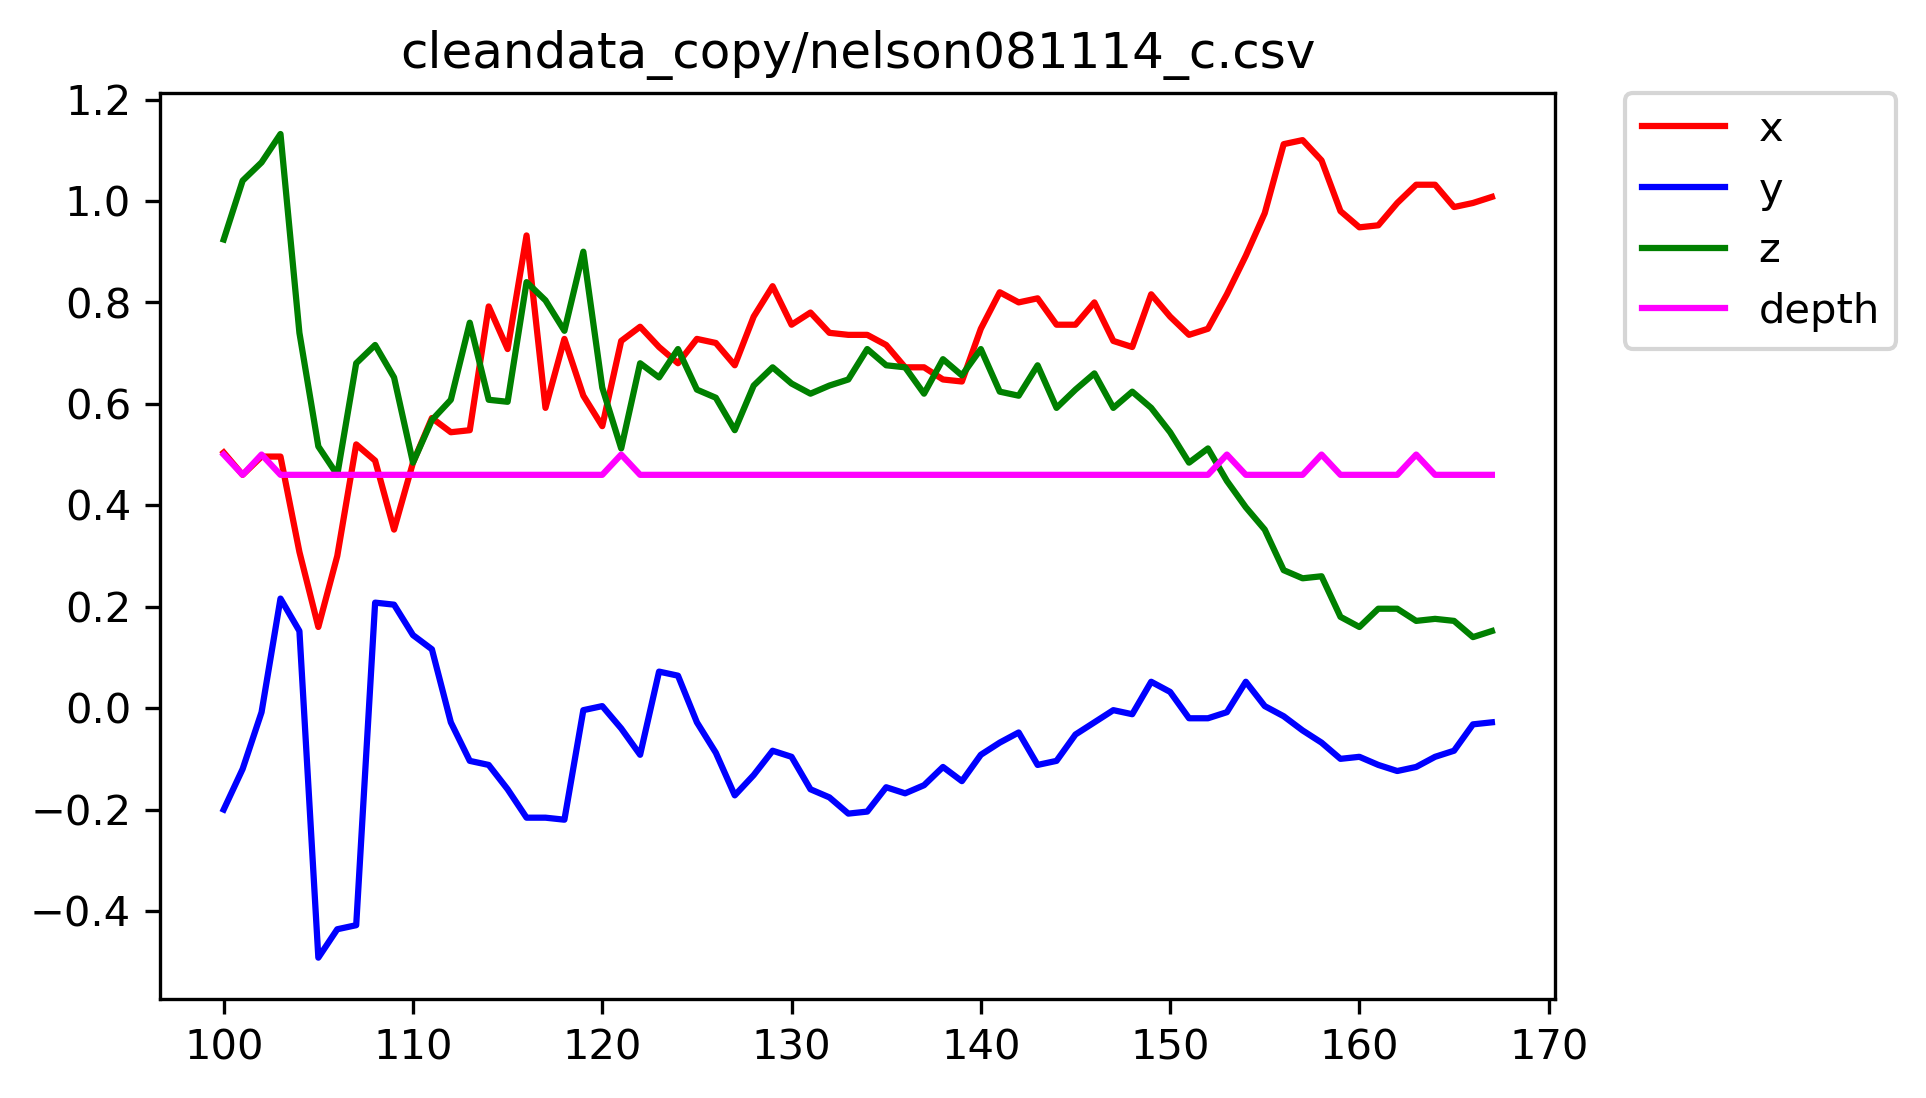

In [137]:
conn = sqlite3.connect('fursealdata.db')
c = conn.cursor()

for file in files_and_ranges:
    # file[0] = dir/filename
    # file[1] = list of ranges
    num_ranges = len(file[1]) # number of ranges in the file
    temp = math.ceil(math.sqrt(num_ranges))
    temp2 = num_ranges - 7
#     plt.figure(dpi=300)
#     k = 0
    filename = file[1]
    for i in range(2, temp2):
        range_for_axis = file[i]
        depth_range = file[i+1]
        x_range = file[i+2]
        y_range = file[i+3]
        z_range = file[i+4]
#         t_range = file[i+5]
#         place_range = file[i+6]
        if i < temp2:
            i += 7
        # grab data from database
        for char in '[,]()':
            range_for_axis = range_for_axis.replace(char,"")
            x_range = x_range.replace(char,"")
            y_range = y_range.replace(char, "")
            z_range = z_range.replace(char, "")
            depth_range = depth_range.replace(char, "")
        range_for_axis = list(map(int, range_for_axis.split()))
        x_range = list(map(float, x_range.split()))
        y_range = list(map(float, y_range.split()))
        z_range = list(map(float, z_range.split()))
        depth_range = list(map(float, depth_range.split()))
#         k += 1   
    #   plt.subplot(temp, temp, k)  # one subplot per range in file
        plt.figure(dpi=300)
        plt.plot(range(range_for_axis[0], range_for_axis[1]), x_range, label='x', color='red')
        plt.plot(range(range_for_axis[0], range_for_axis[1]), y_range, label='y', color='blue')
        plt.plot(range(range_for_axis[0], range_for_axis[1]), z_range, label='z', color='green')
        plt.plot(range(range_for_axis[0], range_for_axis[1]), depth_range, label='depth', color='magenta')
        plt.title(filename)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
conn.close()